In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
nx = 8
ny = 6

#prepare objects points like(0,0,0), (1,0,0), (2,0,0)....,(6,5,0)
objp = np.zeros((ny*nx,3),np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

#Arrays to store object points and image points from all the images
objpoints = []
imgpoints = []

#Make a list of calibration images
images = glob.glob('test_images/GO*.jpg')


In [3]:
for idx, fname in enumerate(images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #Find the chessborad corners
    ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)

    #If found, add object points, image points
    if ret==True:
        objpoints.append(objp)
        imgpoints.append(corners)

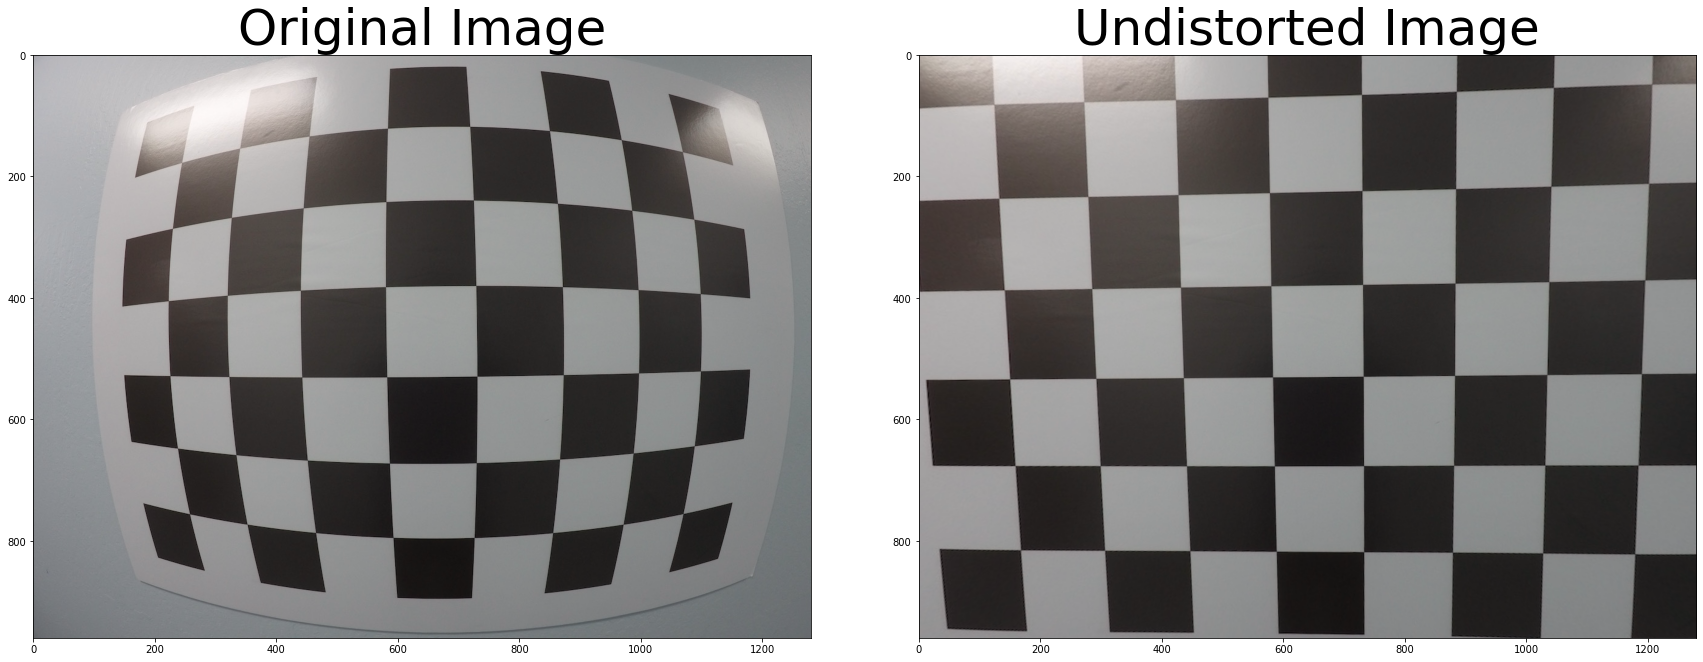

In [4]:
img = cv2.imread('chess.jpg')
img_size = (img.shape[1], img.shape[0])

#Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)

#perform undistortion
undist =cv2.undistort(img,mtx,dist,None,mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)